In [1]:
# 회귀분석

In [2]:
import pandas as pd

housing = pd.read_csv("/Users/ian/Desktop/Study/data/house/housing.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

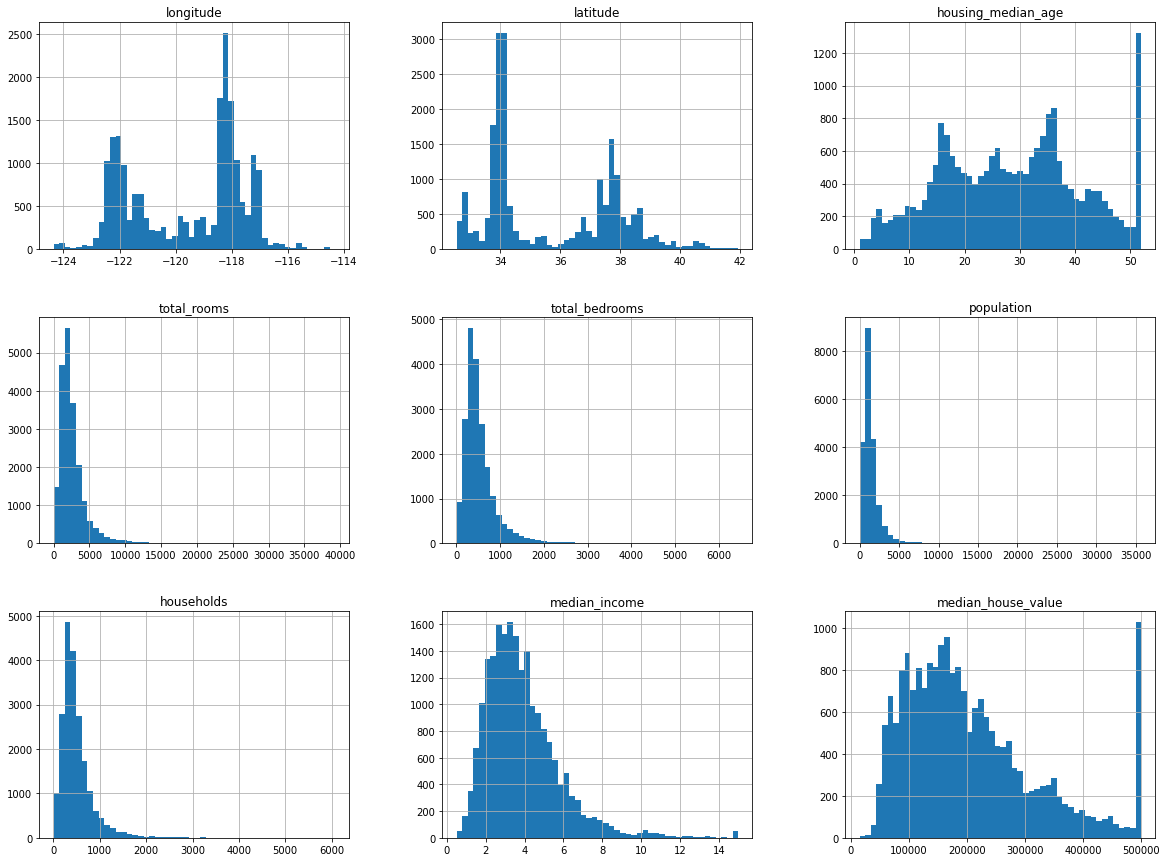

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# 히스토그램
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
import numpy as np
np.random.seed(10)

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)

print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


<AxesSubplot:>

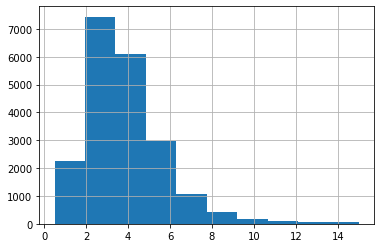

In [7]:
housing["median_income"].hist()

In [8]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

<AxesSubplot:>

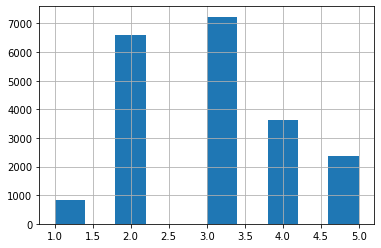

In [9]:
housing["income_cat"].hist()

[Text(0.5, 0, 'longitude'), Text(0, 0.5, 'latitude')]

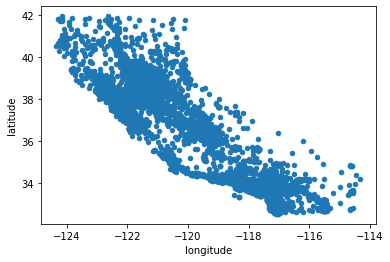

In [10]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel="longitude", ylabel="latitude")

[Text(0.5, 0, 'longitude'), Text(0, 0.5, 'latitude')]

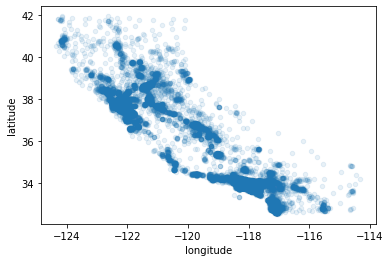

In [11]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel="longitude", ylabel="latitude")

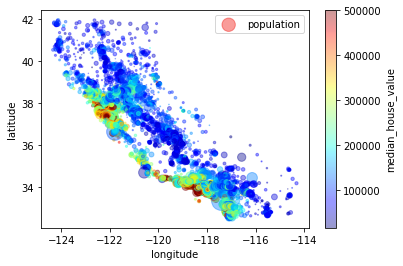

In [12]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()

In [13]:
# 상관계수
corr_matrix = housing.corr()

In [14]:
# 중위주택가격을 기준으로 한 상관계수r-value 행렬
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

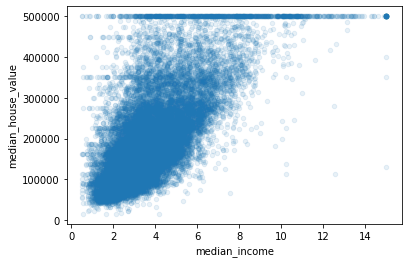

In [15]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [16]:
# 파생변수 만들기
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [17]:
# 파생변수가 포함된 상관계수 행렬
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [18]:
# 머신러닝을 위한 데이터 준비
# 종속변수 제외하기
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

In [19]:
# 결측값 확인
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,NEAR BAY,3.0,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,NEAR BAY,2.0,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,NEAR BAY,2.0,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,NEAR BAY,4.0,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY,3.0,4.633540,NaN,2.403727


In [20]:
# 옵션 1 : 결측값이 있는 행을 제거
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household


In [21]:
# 옵션 2 : 필드 자체를 제거
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,NEAR BAY,3.0,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,NEAR BAY,2.0,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,NEAR BAY,2.0,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,NEAR BAY,4.0,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,NEAR BAY,3.0,4.633540,NaN,2.403727


In [23]:
# 옵션 3 : 중위수로 채움
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,NEAR BAY,3.0,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,NEAR BAY,2.0,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,NEAR BAY,2.0,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,NEAR BAY,4.0,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,NEAR BAY,3.0,4.633540,NaN,2.403727


In [24]:
# 결측값 처리 클래스 이용하기

from sklearn.impute import SimpleImputer

# 결측값은 중위수로 채우고, 카테고리형 종속변수인 ocean_proximity는 제거
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        3.00000000e+00,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [25]:
X = imputer.transform(housing_num)

In [26]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=list(housing.index.values))

In [27]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,3.0,5.761468,0.203162,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,2.0,3.830116,0.203162,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,2.0,4.048704,0.203162,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,4.0,6.102740,0.203162,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,3.0,4.633540,0.203162,2.403727


In [28]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3.0,6.281853,0.172096,2.181467


In [ ]:
# 범주형 변수 ocean_proximity 전처리

In [41]:
housing_cat = housing['ocean_proximity']
housing_cat.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [31]:
# 범주형 변수 ocean_proximity를 원핫인코더를 이용해서 원핫벡터로 변경
# 2차원 배열로 reshape(-1, 1)을 통해서 변경. 앞에가 -1이면 행의 수는 상관이 없다는 뜻

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat.values.reshape(-1,1))

for i in housing_cat_1hot[::1500]:
    print(i)

  (0, 3)	1.0
  (0, 3)	1.0
  (0, 1)	1.0
  (0, 0)	1.0
  (0, 1)	1.0
  (0, 0)	1.0
  (0, 0)	1.0
  (0, 0)	1.0
  (0, 1)	1.0
  (0, 1)	1.0
  (0, 4)	1.0
  (0, 1)	1.0
  (0, 0)	1.0
  (0, 1)	1.0


In [ ]:
# array([0.,1.,0.,0.,0.])과 같이 표현된 것을 밀집행렬
# 그런데 위와 같이 (0,3)   1.0, 즉 인덱스 3번에 1이 들어있다고 표현되어있을 경우에 희소행렬
# 희소행렬로 표현하는 것은 메모리 절약을 위해서

In [32]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [33]:
# 카테고리 확인

encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
# 오디널인코더는 원핫인코더와 다르게 인덱스값 자체가 저장되면서 메모리가 절약됨
# 그런데 값 자체가 저장되다보니 가중치가 붙을 수 있음
# 그래서 희소행렬로 표현하는 것이 제일 좋지 않을까~ 하는거쥐

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values.reshape(-1,1))
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
# Pipeline을 이용해서 결측값 처리
# 숫자형 변수의 정규분포는 평균, 비정규분포는 중위수 // 범주형 변수는 최빈수로 처리

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -1.14993031, -0.04959654],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.99038135, -0.09251223],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -1.44586501, -0.02584253],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
         0.03870567, -0.0717345 ],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
         0.12050112, -0.09122515],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
         0.14290124, -0.04368215]])

In [43]:
# num_attribs는 숫자형 변수에 대한 처리
# cat_attribs는 범주형 변수에 대한 원핫인코더 처리

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_attribs),
    ('cat_encoder', OneHotEncoder(categories='auto'), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)
print(housing_prepared)

(20640, 17)
[[-1.32783522  1.05254828  0.98214266 ...  0.          1.
   0.        ]
 [-1.32284391  1.04318455 -0.60701891 ...  0.          1.
   0.        ]
 [-1.33282653  1.03850269  1.85618152 ...  0.          1.
   0.        ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ...  0.          0.
   0.        ]
 [-0.87362627  1.77823747 -0.84539315 ...  0.          0.
   0.        ]
 [-0.83369581  1.75014627 -1.00430931 ...  0.          0.
   0.        ]]


In [44]:
# 회귀분석 모형 생성

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [49]:
# 샘플 몇 개를 사용해 전체 파이프라인 적용
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

# 학습에 사용된 것과 동일한 형태로 전처리한 후 입력
some_data_prepared = full_pipeline.transform(some_data)

print("Predict: ",lin_reg.predict(some_data_prepared))
print("Real: ",list(some_labels))

Predict:  [405329.9836674  431425.6638532  380843.01490083 322617.82561287
 247982.06698125]
Real:  [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [50]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions) # 평균제곱오차
lin_rmse = np.sqrt(lin_mse) # 평균제곱근오차
lin_rmse

67556.67136964088

In [51]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions) # 평균절대오차
lin_mae

49079.47335253293

In [52]:
# 의사결정나무(회귀) 모델

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [53]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# 평균제곱근오차가 0인 것은 과적합의 위험이 있다는 이야기

0.0

In [54]:
# 따라서 교차검증을 해야함
# mean_squared_error가 크면 정확도가 낮은 것이기 때문에 scoring에서 neg(negative)를 붙여줘야 함

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) # 그래서 여기서 음수로 나온 것을 양수화하고 제곱근 구하기

In [55]:
def display_scores(scores):
    print("Score: ",scores)
    print("Average: ",scores.mean())
    print("Standard Deviation: ",scores.std())

display_scores(tree_rmse_scores)

# 제곱근의 오차가 85126인 것이기에 회귀분석 모델보다 오차가 큼

Score:  [121790.11550948  69241.57770211  82696.0238566   74606.09272336
  88210.54776277  80491.06848452  67860.95880159  98498.5752404
  93662.95951728  74207.18186431]
Average:  85126.51014624124
Standard Deviation:  15534.317419415293


In [56]:
# 랜덤포레스트 모델

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=10)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=10)

In [57]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21809.135554480577

In [58]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Score:  [100527.7278113   48230.67218336  67816.54646189  59100.08939859
  64587.13952492  62258.18983382  49519.9463672   79851.60993721
  76441.31715547  52035.24246558]
Average:  66036.84811393432
Standard Deviation:  15304.575031531545


In [59]:
# SVM 모델

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

104051.63449431388

In [ ]:
# 여기까지 돌려봤을 때 랜덤포레스트 모형이 제일 점수가 좋음
# 그래서 랜덤포레스트 모델로 GridSearch 돌리기

In [60]:
# 그리드서치

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [61]:
# 최상의 파라미터 조합

print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 4, 'n_estimators': 30}
RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)


In [62]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

79105.64295152499 {'max_features': 2, 'n_estimators': 3}
71559.57490832423 {'max_features': 2, 'n_estimators': 10}
68616.27407801132 {'max_features': 2, 'n_estimators': 30}
76795.65377108876 {'max_features': 4, 'n_estimators': 3}
69405.06343442471 {'max_features': 4, 'n_estimators': 10}
67747.14193844849 {'max_features': 4, 'n_estimators': 30}
77957.54601347217 {'max_features': 6, 'n_estimators': 3}
71358.13178860754 {'max_features': 6, 'n_estimators': 10}
69124.37467474867 {'max_features': 6, 'n_estimators': 30}
77960.46635983903 {'max_features': 8, 'n_estimators': 3}
71405.16688867405 {'max_features': 8, 'n_estimators': 10}
69426.32533434084 {'max_features': 8, 'n_estimators': 30}
79105.64295152499 {'max_features': 2, 'n_estimators': 3}
71559.57490832423 {'max_features': 2, 'n_estimators': 10}
81680.72066499281 {'max_features': 3, 'n_estimators': 3}
71055.59376162535 {'max_features': 3, 'n_estimators': 10}
76795.65377108876 {'max_features': 4, 'n_estimators': 3}
69405.06343442471 {'m

In [63]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.145553,0.003964,0.005646,0.000954,2,3,"{'max_features': 2, 'n_estimators': 3}",-4.958785e+09,-6.276212e+09,-6.013846e+09,...,-6.257703e+09,9.739176e+08,16,-1.112570e+09,-1.055760e+09,-1.052149e+09,-1.077850e+09,-1.055406e+09,-1.070747e+09,2.282756e+07
1,0.461320,0.003464,0.017663,0.001891,2,10,"{'max_features': 2, 'n_estimators': 10}",-4.663133e+09,-5.066254e+09,-4.750308e+09,...,-5.120773e+09,7.689263e+08,10,-5.849703e+08,-5.641571e+08,-5.374941e+08,-5.611749e+08,-5.341410e+08,-5.563875e+08,1.871966e+07
2,1.377682,0.006910,0.042748,0.004556,2,30,"{'max_features': 2, 'n_estimators': 30}",-4.801208e+09,-4.544499e+09,-4.378248e+09,...,-4.708193e+09,5.617804e+08,2,-4.258889e+08,-4.082417e+08,-3.905410e+08,-4.102192e+08,-3.884985e+08,-4.046779e+08,1.381983e+07
3,0.226974,0.005209,0.005808,0.001725,4,3,"{'max_features': 4, 'n_estimators': 3}",-5.996106e+09,-5.597934e+09,-5.177108e+09,...,-5.897572e+09,6.451827e+08,12,-9.696328e+08,-9.176450e+08,-8.414591e+08,-1.001897e+09,-8.774331e+08,-9.216134e+08,5.855537e+07
4,0.872723,0.143723,0.016731,0.002184,4,10,"{'max_features': 4, 'n_estimators': 10}",-4.688201e+09,-4.742936e+09,-4.146546e+09,...,-4.817063e+09,6.955988e+08,4,-5.275419e+08,-5.006594e+08,-4.713188e+08,-4.980460e+08,-4.664810e+08,-4.928094e+08,2.213786e+07


In [64]:
# 그리드서치는 모형개수estimator와 변수feature의 숫자를 정확히 지정해줘야 함
# RandomizedSearch는 하이퍼 파라미터를 지정된 범위 안에서 랜덤으로 선택하여 평가

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fae46c08a00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fae63ed5190>},
                   random_state=42, scoring='neg_mean_squared_error')

In [65]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

67907.88046032331 {'max_features': 7, 'n_estimators': 180}
69267.05452999046 {'max_features': 5, 'n_estimators': 15}
68016.07501616352 {'max_features': 3, 'n_estimators': 72}
68668.30473925552 {'max_features': 5, 'n_estimators': 21}
68077.59320018915 {'max_features': 7, 'n_estimators': 122}
67972.58826649266 {'max_features': 3, 'n_estimators': 75}
67912.45512325816 {'max_features': 3, 'n_estimators': 88}
67116.23506551817 {'max_features': 5, 'n_estimators': 100}
67327.50228876814 {'max_features': 3, 'n_estimators': 150}
80526.84843728555 {'max_features': 5, 'n_estimators': 2}


In [66]:
print(rnd_search.best_estimator_)

feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

RandomForestRegressor(max_features=5, random_state=42)
[0.07241321 0.07347362 0.04250938 0.02069148 0.02067397 0.02163058
 0.01970739 0.20390365 0.17182544 0.0676013  0.04778796 0.100494
 0.01802616 0.10624506 0.00022475 0.00571333 0.00707871]


In [68]:
# 특성중요도와 변수명 연결

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.20390365406929908, 'median_income'),
 (0.17182544226447694, 'income_cat'),
 (0.10624506481434956, 'pop_per_hhold'),
 (0.1004940022775762, 'population_per_household'),
 (0.07347362150754003, 'latitude'),
 (0.07241320584590158, 'longitude'),
 (0.06760130019731687, 'rooms_per_household'),
 (0.04778795870390004, 'bedrooms_per_room'),
 (0.042509375882152416, 'housing_median_age'),
 (0.021630576996084453, 'population'),
 (0.020691477339632072, 'total_rooms'),
 (0.020673972792715108, 'total_bedrooms'),
 (0.01970739137015652, 'households'),
 (0.018026161560367383, 'rooms_per_hhold'),
 (0.007078706804395593, 'INLAND'),
 (0.005713333577280297, '<1H OCEAN'),
 (0.00022475399685595177, 'bedrooms_per_room')]

In [70]:
# 전처리와 예측을 포함한 파이프라인

full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("linear", RandomForestRegressor(max_features=4, n_estimators=30, random_state=10))
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([439023.53333333, 387260.03333333, 381553.43333333, 335396.66666667,
       308970.        ])

In [71]:
import joblib

my_model = full_pipeline_with_predictor
joblib.dump(my_model, "my_model.model") # 모델 저장할 때
# 불러올 때 : my_model_loaded = joblib.load("my_model.model")

['my_model.model']